In [645]:
import pandas as pd 
import numpy as np
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt 
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
import warnings
warnings.filterwarnings("ignore")

data=pd.read_excel(r'Final mumbai data.xlsx',
                   index_col=0,
                   parse_dates=True,
                   squeeze=True,
                   engine='openpyxl')
data.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANUUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
YEAR,,,,,,,,,,,,,,,,,
1878-01-01,22.9,24.9,26.4,28.1,29.9,29.1,26.9,26.8,27.1,28.3,26.8,24.1,26.775000,23.90,28.133333,27.475,26.400000
1879-01-01,24.1,24.0,25.9,27.6,28.5,27.6,27.4,25.9,26.4,26.8,24.9,23.4,26.041667,24.05,27.333333,26.825,25.033333
1880-01-01,23.3,23.6,26.9,28.6,29.5,28.5,26.5,26.5,26.0,27.5,27.0,25.4,26.608333,23.45,28.333333,26.875,26.633333
1881-01-01,24.9,25.4,26.3,28.1,29.8,28.6,27.0,26.8,26.8,27.2,26.5,25.2,26.883333,25.15,28.066667,27.300,26.300000
1882-01-01,24.7,24.2,26.5,27.8,28.9,27.4,25.9,26.9,26.4,26.9,25.3,24.7,26.300000,24.45,27.733333,26.650,25.633333


In [646]:
df=data[["ANUUAL ","JAN-FEB","MAR-MAY","JUN-SEP","OCT-DEC"]]
df.head()

,ANUUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
YEAR,,,,,
1878-01-01,26.775000,23.90,28.133333,27.475,26.400000
1879-01-01,26.041667,24.05,27.333333,26.825,25.033333
1880-01-01,26.608333,23.45,28.333333,26.875,26.633333
1881-01-01,26.883333,25.15,28.066667,27.300,26.300000
1882-01-01,26.300000,24.45,27.733333,26.650,25.633333


<AxesSubplot:xlabel='YEAR'>

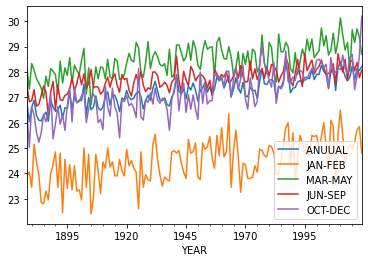

In [647]:
df.plot()

# Predictions for ANNUAL temperature

In [648]:
from statsmodels.tsa.stattools import adfuller


In [649]:
test_result=adfuller(df['ANUUAL '])


In [650]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(ANNUAL):
    result=adfuller(ANNUAL)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [651]:

adfuller_test(df['ANUUAL '])


ADF Test Statistic : -1.2861858014695025
p-value : 0.6354683911437523
#Lags Used : 9
Number of Observations Used : 132
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [652]:
df['ANNUAL First Difference'] = df['ANUUAL '] - df['ANUUAL '].shift(1)

In [653]:
df['ANNUAL second Difference']=df['ANNUAL First Difference'].diff()
df['ANNUAL second Difference']

YEAR
1878-01-01         NaN
1879-01-01         NaN
1880-01-01    1.300000
1881-01-01   -0.291667
1882-01-01   -0.858333
                ...   
2015-01-01    0.266667
2016-01-01   -0.983333
2017-01-01    1.008333
2018-01-01   -0.508333
2019-01-01    0.208333
Name: ANNUAL second Difference, Length: 142, dtype: float64

In [654]:
adfuller_test(df['ANNUAL second Difference'].dropna())


ADF Test Statistic : -7.278963165416738
p-value : 1.5180538886187266e-10
#Lags Used : 12
Number of Observations Used : 127
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='YEAR'>

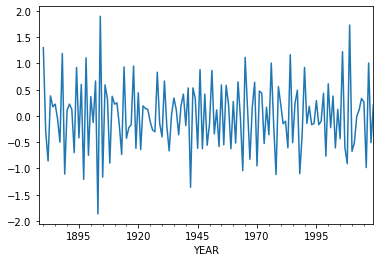

In [655]:
df['ANNUAL second Difference'].plot()


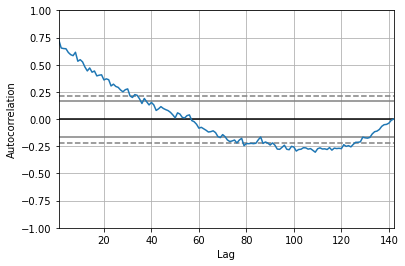

In [656]:
import matplotlib.pyplot as plt 
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['ANUUAL '])
plt.show()


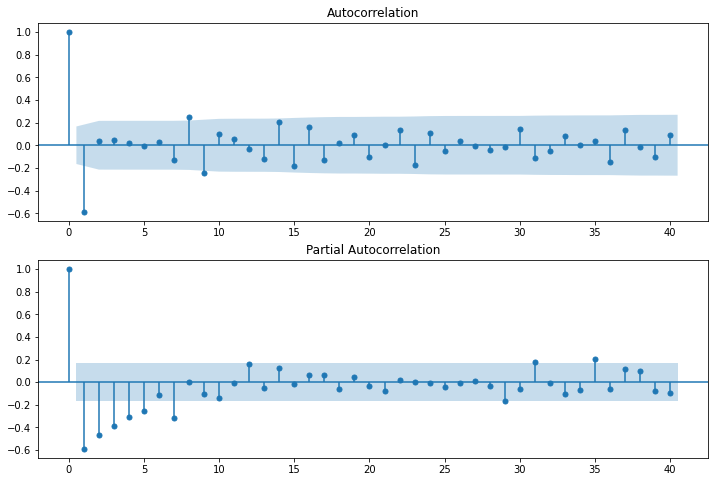

In [657]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['ANNUAL second Difference'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['ANNUAL second Difference'].iloc[2:],lags=40,ax=ax2)


In [658]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['ANUUAL '],order=(7,2,1)).fit(transparams=False)



In [659]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D2.ANUUAL    No. Observations:                  140
Model:                 ARIMA(7, 2, 1)   Log Likelihood                 -36.279
Method:                       css-mle   S.D. of innovations              0.303
Date:                Thu, 25 Feb 2021   AIC                             92.558
Time:                        18:23:36   BIC                            121.975
Sample:                    01-01-1880   HQIC                           104.512
                         - 01-01-2019                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.267e-06      0.000     -0.043      0.966      -0.000       0.000
ar.L1.D2.ANUUAL     -0.7408      0.082     -9.007      0.000      -0.902      -0.580
ar.L2.D2.ANUUAL     -0.6917      0.100     -6.949      0.000      -0.887      -0.497
ar.L3.D2.ANUUAL     -0.5702      0.111     -5.154      0.000      -0.787      -0.353
ar.L4.D2.ANUUAL     -0.4753      0.115     -4.151      0.000      -0.700      -0.251
ar.L5.D2.ANUUAL     -0.4175      0.112     -3.738      0.000      -0.636      -0.199
ar.L6.D2.ANUUAL     -0.3419      0.101     -3.382      0.001      -0.540      -0.144
ar.L7.D2.ANUUAL     -0.2751      0.083     -3.311      0.001      -0.438      -0.112
ma.L1.D2.ANUUAL     -1.0000      0.019    -52.048      0.000      -1.038      -0.962
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8330           -0.8383j            1.1818           -0.1255
AR.2            0.8330           +0.8383j            1.1818            0.1255
AR.3            0.0025           -1.1886j            1.1886           -0.2497
AR.4            0.0025           +1.1886j            1.1886            0.2497
AR.5           -1.2298           -0.0000j            1.2298           -0.5000
AR.6           -0.8421           -0.8883j            1.2241           -0.3708
AR.7           -0.8421           +0.8883j            1.2241            0.3708
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='YEAR'>

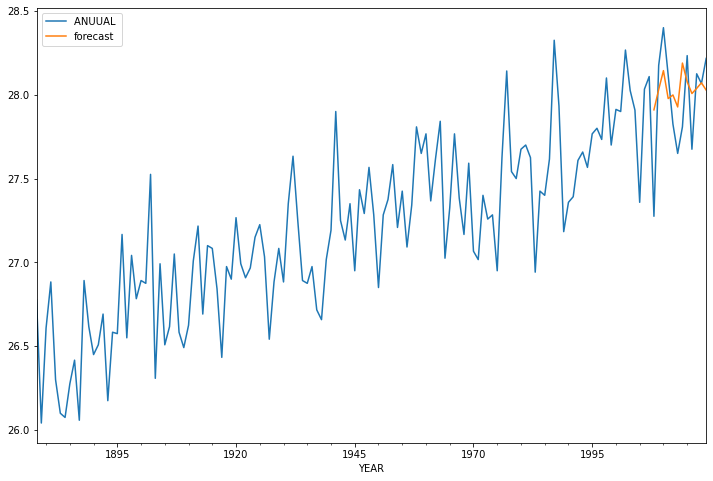

In [660]:
df['forecast']=model.predict(start=130,end=141,dynamic=True,typ='levels')
df[['ANUUAL ','forecast']].plot(figsize=(12,8))


In [661]:
actual = df[['ANUUAL ']].iloc[130:142]
#print(actual)
predicted = df[['forecast']].iloc[130:142]
#print(predicted)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(actual, predicted,squared=False)

print(mse)


0.27971530808804945


In [662]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(years=x)for x in range(0,20)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df

future_df=pd.concat([df,future_datest_df])
future_df

future_df['forecast'] = model.predict(start =141, end =163, dynamic= True,typ='levels')
fig = px.line(future_df,y=['ANUUAL ', 'forecast'],labels={"value":"Temperature(°C)"},title="Prediction for ANNUAL temperature")
fig.show()

In [663]:
username = 'TROPICSU' # your username
api_key = 'sqFXkXIxv94tXI4BCvUI' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename = 'Predictions for ANNUAL temperature', auto_open=True)

'https://plotly.com/~TROPICSU/75/'

# Prediction for JAN-FEB

In [699]:
df[['JAN-FEB diff']]=df[['JAN-FEB']].diff(1)
df[['JAN-FEB diff']]

,JAN-FEB diff
YEAR,
1878-01-01,NaN
1879-01-01,0.15
1880-01-01,-0.60
1881-01-01,1.70
1882-01-01,-0.70
...,...
2015-01-01,-0.20
2016-01-01,0.30
2017-01-01,0.45


<AxesSubplot:xlabel='YEAR'>

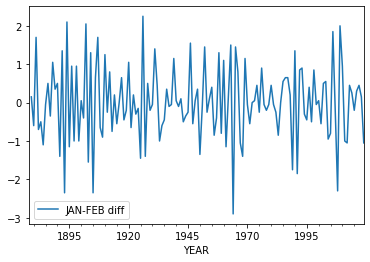

In [700]:
df[['JAN-FEB diff']].plot()

In [701]:
adfuller_test(df['JAN-FEB diff'].iloc[1:])

ADF Test Statistic : -8.899992741727909
p-value : 1.178448538673213e-14
#Lags Used : 6
Number of Observations Used : 134
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


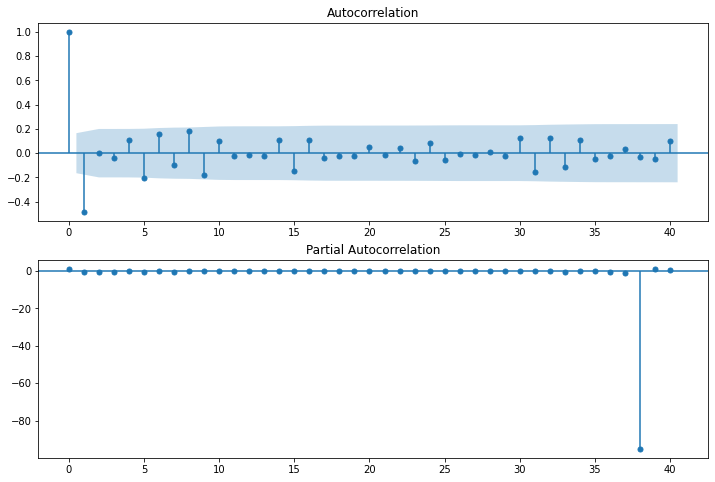

In [702]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['JAN-FEB diff'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['JAN-FEB diff'].iloc[1:],lags=40,ax=ax2)

In [703]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['JAN-FEB'],order=(7,1,2)).fit(transparams=False)
#model.summary()

In [704]:
import plotly.express as px
df['forecast JAN-FEB']=model.predict(start=130,end=141,dynamic=True,typ='levels')
fig = px.line(df,y=["forecast JAN-FEB","JAN-FEB"],labels={"value":"Temperature(°C)"},title="Prediction for JAN-FEB")
fig.show()


In [705]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(years=x)for x in range(0,20)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df

future_df=pd.concat([df,future_datest_df])
future_df

future_df['forecast'] = model.predict(start =141, end =163, dynamic= True,typ='levels')
fig = px.line(future_df,y=['JAN-FEB', 'forecast'],labels={"value":"Temperature(°C)"},title="Prediction for JAN-FEB temperature")
fig.show()

In [706]:
actual = df[['JAN-FEB']].iloc[130:142]
#print(actual)
predicted = df[['forecast JAN-FEB']].iloc[130:142]
#print(predicted)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(actual, predicted,squared=False)

print(mse)

0.6936044318070815


In [707]:
username = 'TROPICSU' # your username
api_key = 'sqFXkXIxv94tXI4BCvUI' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename = 'Predictions for JAN -FEB', auto_open=True)

'https://plotly.com/~TROPICSU/73/'

# Predictions for MAR-MAY

In [672]:
df[['MAR-MAY diff']]=df[['MAR-MAY']].diff()
df[['MAR-MAY diff']]

,MAR-MAY diff
YEAR,
1878-01-01,NaN
1879-01-01,-0.800000
1880-01-01,1.000000
1881-01-01,-0.266667
1882-01-01,-0.333333
...,...
2015-01-01,1.633333
2016-01-01,-0.500000
2017-01-01,0.533333


<AxesSubplot:xlabel='YEAR'>

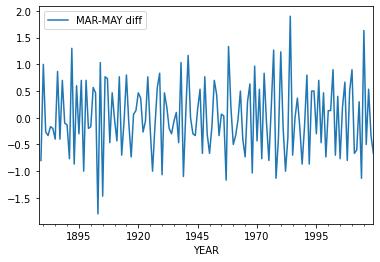

In [673]:
df[['MAR-MAY diff']].plot()

In [674]:
adfuller_test(df['MAR-MAY diff'].iloc[1:])

ADF Test Statistic : -8.753777427485938
p-value : 2.79075172155235e-14
#Lags Used : 6
Number of Observations Used : 134
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


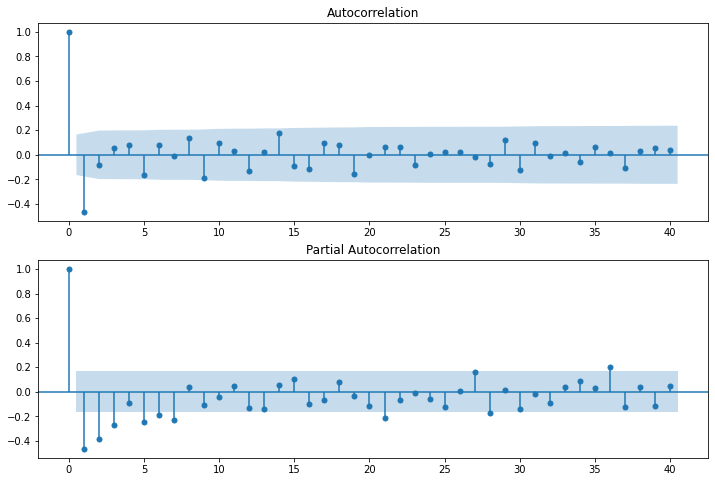

In [675]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['MAR-MAY diff'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['MAR-MAY diff'].iloc[1:],lags=40,ax=ax2)

In [676]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['MAR-MAY'],order=(7,1,1)).fit(transparams=False)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.MAR-MAY   No. Observations:                  141
Model:                 ARIMA(7, 1, 1)   Log Likelihood                -100.944
Method:                       css-mle   S.D. of innovations                nan
Date:                Thu, 25 Feb 2021   AIC                            221.889
Time:                        18:23:51   BIC                            251.376
Sample:                    01-01-1879   HQIC                           233.872
                         - 01-01-2019                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0112      0.009      1.294      0.196      -0.006       0.028
ar.L1.D.MAR-MAY    -1.2103      0.321     -3.775      0.000      -1.839      -0.582
ar.L2.D.MAR-MAY    -1.1252      0.288     -3.909      0.000      -1.689      -0.561
ar.L3.D.MAR-MAY    -0.9341      0.273     -3.426      0.001      -1.468      -0.400
ar.L4.D.MAR-MAY    -0.7427      0.229     -3.245      0.001      -1.191      -0.294
ar.L5.D.MAR-MAY    -0.6972      0.185     -3.764      0.000      -1.060      -0.334
ar.L6.D.MAR-MAY    -0.5118      0.160     -3.198      0.001      -0.826      -0.198
ar.L7.D.MAR-MAY    -0.2879      0.091     -3.160      0.002      -0.466      -0.109
ma.L1.D.MAR-MAY     0.3345      0.329      1.016      0.309      -0.310       0.979
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7628           -0.9081j            1.1859           -0.1388
AR.2            0.7628           +0.9081j            1.1859            0.1388
AR.3           -0.1785           -1.1682j            1.1817           -0.2741
AR.4           -0.1785           +1.1682j            1.1817            0.2741
AR.5           -1.1460           -0.0000j            1.1460           -0.5000
AR.6           -0.9002           -0.8560j            1.2422           -0.3790
AR.7           -0.9002           +0.8560j            1.2422            0.3790
MA.1           -2.9898           +0.0000j            2.9898            0.5000
-----------------------------------------------------------------------------
"""

In [677]:
import plotly.express as px
df['forecast MAR-MAY']=model.predict(start=130,end=141,dynamic=True,typ='levels')
fig = px.line(df,y=["forecast MAR-MAY","MAR-MAY"],labels={"value":"Temperature(°C)"},title="Prediction for MAR-MAY")
fig.show()

In [678]:
actual = df[['MAR-MAY']].iloc[130:142]
#print(actual)
predicted = df[['forecast MAR-MAY']].iloc[130:142]
#print(predicted)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(actual, predicted,squared=False)

print(mse)

0.5098146860743896


In [679]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(years=x)for x in range(0,20)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df

future_df=pd.concat([df,future_datest_df])
future_df

future_df['forecast'] = model.predict(start =141, end =163, dynamic= True,typ='levels')
fig = px.line(future_df,y=['MAR-MAY', 'forecast'],labels={"value":"Temperature(°C)"},title="Prediction for MAR-MAY temperature")
fig.show()

In [680]:
username = 'TROPICSU' # your username
api_key = 'sqFXkXIxv94tXI4BCvUI' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename = 'Predictions for MAR-MAY', auto_open=True)

'https://plotly.com/~TROPICSU/77/'

# Predictions for JUN-SEP temperature 

In [681]:
df[['JUN-SEP diff']]=df[['JUN-SEP']].diff(2)
#df[['JUN-SEP diff']]

<AxesSubplot:xlabel='YEAR'>

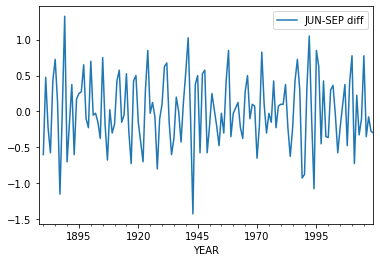

In [682]:
df[['JUN-SEP diff']].plot()

In [683]:
adfuller_test(df['JUN-SEP diff'].iloc[2:])

ADF Test Statistic : -5.215559453374517
p-value : 8.171271607170008e-06
#Lags Used : 11
Number of Observations Used : 128
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


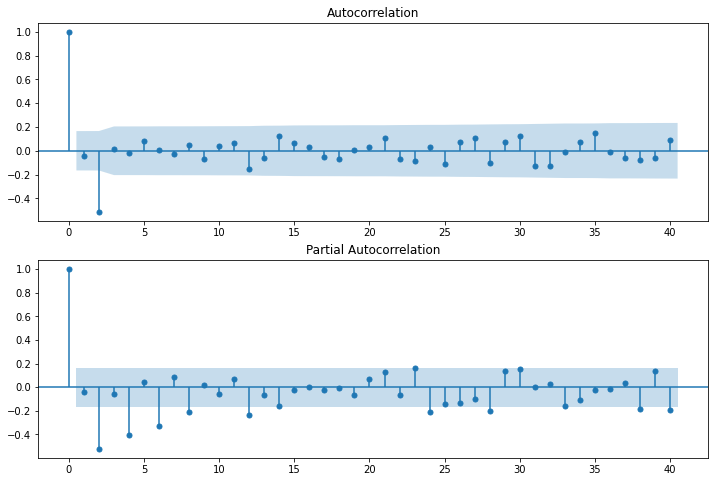

In [684]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['JUN-SEP diff'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['JUN-SEP diff'].iloc[2:],lags=40,ax=ax2)

In [685]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['JUN-SEP'],order=(4,2,1)).fit(transparams=False)
#model.summary()


In [686]:
import plotly.express as px
df['forecast JUN-SEP']=model.predict(start=130,end=141,dynamic=True,typ='levels')
fig = px.line(df,y=["forecast JUN-SEP","JUN-SEP"],labels={"value":"Temperature(°C)"},title="Prediction for JUN-SEP")
fig.show()

In [687]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(years=x)for x in range(0,20)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df

future_df=pd.concat([df,future_datest_df])
future_df

future_df['forecast'] = model.predict(start =140, end =163, dynamic= True,typ='levels')
fig = px.line(future_df,y=['JUN-SEP', 'forecast'],labels={"value":"Temperature(°C)"},title="Prediction for JUN-SEP temperature")
fig.show()

In [688]:
username = 'TROPICSU' # your username
api_key = 'sqFXkXIxv94tXI4BCvUI' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename = 'Predictions for JUN-SEP temperature', auto_open=True)

'https://plotly.com/~TROPICSU/82/'

In [689]:
actual = df[['JUN-SEP']].iloc[130:142]
#print(actual)
predicted = df[['forecast JUN-SEP']].iloc[130:142]
#print(predicted)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(actual, predicted,squared=False)

print(mse)

0.38053959258755216


# Predictions from OCT-DEC

In [690]:
df[['OCT-DEC diff']]=df[['OCT-DEC']].diff(2)


<AxesSubplot:xlabel='YEAR'>

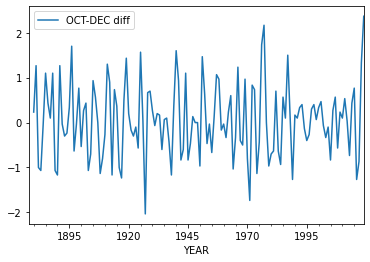

In [691]:
df[['OCT-DEC diff']].plot()

In [692]:
adfuller_test(df['OCT-DEC diff'].iloc[2:])

ADF Test Statistic : -3.6590144681124426
p-value : 0.004728012230283106
#Lags Used : 14
Number of Observations Used : 125
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


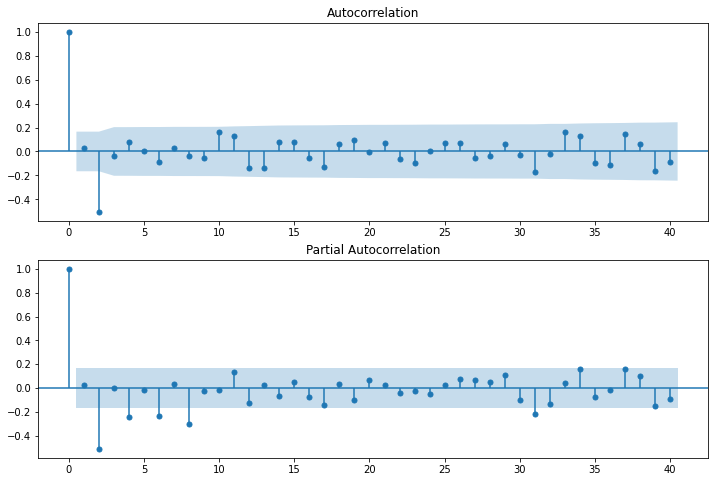

In [693]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['OCT-DEC diff'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['OCT-DEC diff'].iloc[2:],lags=40,ax=ax2)

In [694]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['OCT-DEC'],order=(6,2,1)).fit(transparams=False)
#model.summary()


In [695]:
import plotly.express as px
df['forecast OCT-DEC']=model.predict(start=130,end=141,dynamic=True,typ='levels')
fig = px.line(df,y=["forecast OCT-DEC","OCT-DEC"],labels={"value":"Temperature(°C)"},title="Prediction for OCT-DEC")
fig.show()

In [696]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(years=x)for x in range(0,20)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df

future_df=pd.concat([df,future_datest_df])
future_df

future_df['forecast'] = model.predict(start =138, end =163, dynamic= True,typ='levels')
fig = px.line(future_df,y=['OCT-DEC', 'forecast'],labels={"value":"Temperature(°C)"},title="Prediction for OCT-DEC temperature")
fig.show()

In [697]:
username = 'TROPICSU' # your username
api_key = 'sqFXkXIxv94tXI4BCvUI' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename = 'Predictions for OCT-DEC temperature', auto_open=True)

'https://plotly.com/~TROPICSU/84/'

In [698]:
actual = df[['OCT-DEC']].iloc[130:142]
#print(actual)
predicted = df[['forecast OCT-DEC']].iloc[130:142]
#print(predicted)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(actual, predicted,squared=False)

print(mse)

0.7764772666768058
